###  Import Required Libraries
We begin by importing essential libraries for data manipulation, visualization, and machine learning.


In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the Advertising Dataset
Read the advertising dataset into a DataFrame for analysis.


In [107]:
df=pd.read_csv("advertising_10000.csv")

###  Preview the Dataset
View the first few rows to understand the structure and data types.


In [108]:
df.head()

,TV,Radio,Newspaper,Sales
0,112.362036,18.682041,72.999831,9.063791
1,285.214292,16.645605,18.451200,19.526858
2,219.598183,8.807696,34.663969,14.720755
3,179.597545,30.363334,66.328064,16.182797
4,46.805592,23.831208,48.208934,7.012252


###  Check for Missing Values
Ensure that there are no missing values in the dataset before proceeding.


In [109]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [110]:
df.describe()

,TV,Radio,Newspaper,Sales
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,148.247867,25.226494,50.005039,12.379464
std,86.289038,14.464728,28.677376,4.974755
min,0.003490,0.007887,0.004812,-1.344271
25%,73.898661,12.697290,25.374791,8.773998
50%,147.758585,25.294839,50.206809,12.310463
75%,222.001904,37.823961,74.467385,16.071080
max,299.915302,49.996241,99.990098,26.862828


In [111]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,-0.005125,-0.009346,0.775718
Radio,-0.005125,1.000000,-0.024219,0.538233
Newspaper,-0.009346,-0.024219,1.000000,0.094018
Sales,0.775718,0.538233,0.094018,1.000000


### Feature Correlation Heatmap
Visualize how strongly each feature is correlated with the target variable `Sales`.


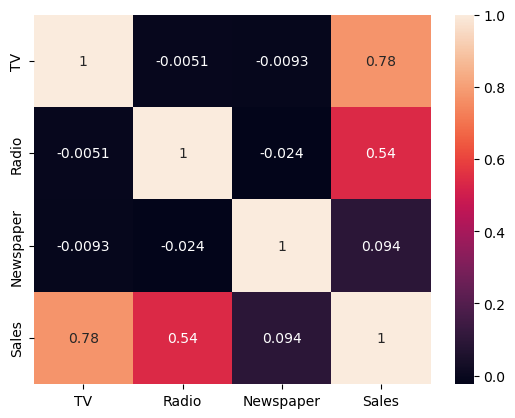

In [112]:
sns.heatmap(df.corr(),annot=True)
plt.show()

###  Feature and Target Split
Separate the dataset into independent features (`TV`, `Radio`, `Newspaper`) and the target variable (`Sales`).


In [113]:
x=df.iloc[:,:-1]
y=df['Sales']

In [114]:
x.head()

,TV,Radio,Newspaper
0,112.362036,18.682041,72.999831
1,285.214292,16.645605,18.451200
2,219.598183,8.807696,34.663969
3,179.597545,30.363334,66.328064
4,46.805592,23.831208,48.208934


In [115]:
y.head()

0     9.063791
1    19.526858
2    14.720755
3    16.182797
4     7.012252
Name: Sales, dtype: float64

###  Split Data into Training and Testing Sets
Divide the dataset into training and testing sets to evaluate model performance fairly.


In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [118]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 3), (2000, 3), (8000,), (2000,))

###  Scale Features
Standardize the feature values using `StandardScaler` to improve model convergence.


In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
sc=StandardScaler()

In [121]:
x_train=sc.fit_transform(x_train)

In [122]:
x_test=sc.transform(x_test)

In [123]:
x_train,x_test

(array([[ 0.96505976, -1.22837193,  1.56292285],
        [-0.89007804, -0.86017655, -1.13171302],
        [-0.39062276, -0.57406153, -0.08030912],
        ...,
        [-1.22855574, -1.21898579, -1.06084309],
        [ 0.98143496,  1.53824822, -0.77347298],
        [-0.59877831, -0.03733579, -0.9954459 ]]),
 array([[-0.54053032, -1.4006512 ,  1.63132145],
        [ 0.98135741,  0.98621599, -1.06241372],
        [ 0.45460468, -1.01479943,  1.70235626],
        ...,
        [-0.68549714, -0.13786551,  0.95201516],
        [-1.09973244, -0.6505395 , -1.70678602],
        [ 0.50409434,  1.00714264,  0.71735091]]))

### Train Multiple Linear Regression Model
Fit a linear regression model on the scaled training data.


In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
lr=LinearRegression()

In [126]:
lr.fit(x_train,y_train)

LinearRegression()

### Predict Sales on Test Set
Use the trained model to predict sales values for the test set.


In [127]:
lr.score(x_test,y_test)*100

90.66543561668158

In [128]:
print("Coefficient=",lr.coef_)
print("Intercept=",lr.intercept_)

Coefficient= [3.8920133  2.72204633 0.56693225]
Intercept= 12.354871558069764


In [129]:
y_pred=lr.predict(x_test)

###  Model Evaluation Metrics
Evaluate model performance using MAE, MSE, and RMSE to understand the prediction error.


In [130]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

MSE : 2.29
MAE : 1.21
RMSE : 1.51


###  Model Accuracy (R² Score)
Check how well the model explains the variance in the target variable.


In [131]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(f"R2_Score : {r2:.2f}")
adjust_r2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjust R2 : {adjust_r2:.2f}")

R2_Score : 0.91
Adjust R2 : 0.91


###  Visualize Actual vs Predicted Sales
Create a scatter plot to compare actual sales vs predicted sales for visual accuracy.


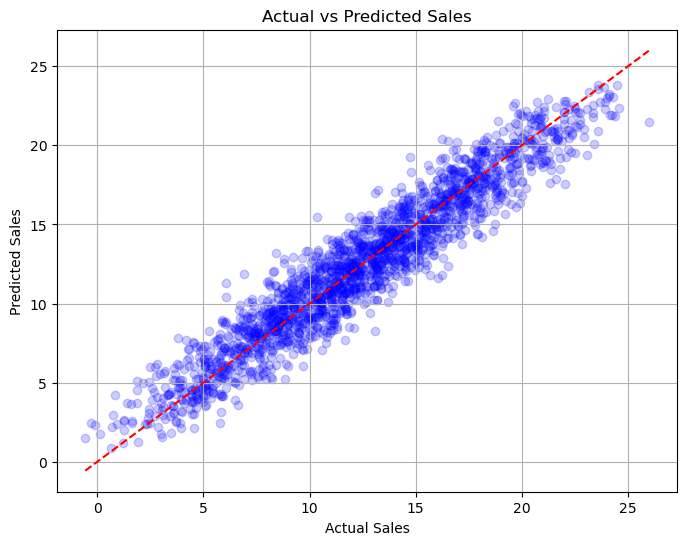

In [132]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.2, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

### 🧾 Predict Sales for a New Advertising Budget
Make a prediction for a custom input of `TV`, `Radio`, and `Newspaper` ad spend.


In [133]:
lr.predict(sc.transform([[112.362036,18.682041,72.999831]]))

array([9.98950453])

In [134]:
lr.predict(sc.transform([[120,20,75]]))

array([10.6205682])